# Analysis of Complex Networks 
## Assignment 4 (Group 6)
### Student: André Dussing  ID: 018113442F 

Github: https://github.com/andreunilux/Complex-Networks check for change

In [23]:
# import necessary libraries
import networkx as nx
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random
from sklearn.metrics.pairwise import cosine_similarity

At first we set the path according to our dataset we are using (here Group6)


1. Facebook-Ego 
2. Twitter-Ego

In [24]:
path = "exercise_complex_network/Datasets/Group6"
path_facebook = os.path.join(path,"Facebook-Ego", "1684.edges" ) # 1. Facebook-Ego
path_twitter =  os.path.join(path,"Twitter-Ego", "2029971.edges" ) # 2. Twitter-Ego
# Now we read the edge list from the file and create the graph with NetworkX


facebook_graph = nx.read_edgelist(path_facebook, nodetype=int) # Undirected
twitter_graph = nx.read_edgelist(path_twitter, nodetype=int, create_using=nx.DiGraph()) #Directed




### (a) Choose one of the datasets, calculate the betweenness closeness and PageRank mentioned in the lecture on all of the nodes. Please compare the results. What cause the difference between the results?

number of notes with betweeness metric: 157
number of notes with closness metric: 157
number of notes with pagerank metric: 157
Top 10 nodes by Betweenness Centrality: [(2787, 0.39030234335448666), (2694, 0.34306517346517584), (2734, 0.13399125308707593), (1505, 0.109532252838866), (2781, 0.09894759455788699), (107, 0.0892493752425134), (2793, 0.08604842461682878), (2724, 0.08474723180291893), (2730, 0.06859491810376696), (2690, 0.06816141316099945)]
Top 10 nodes by Closeness Centrality: [(2787, 0.34857404500261646), (2781, 0.31703254209054677), (2694, 0.30844475314001274), (2793, 0.30163581819210955), (2690, 0.2932210850665786), (2734, 0.2913454704499481), (2783, 0.2913454704499481), (2730, 0.29010833469432196), (2762, 0.2805770547043648), (2716, 0.27942950028839597)]
Top 10 nodes by PageRank: [(2754, 0.015312605466333958), (2730, 0.014544999255061213), (2724, 0.014500557593030696), (2716, 0.014448200976085377), (107, 0.013810084969400366), (2742, 0.012791740026956011), (2786, 0.01261

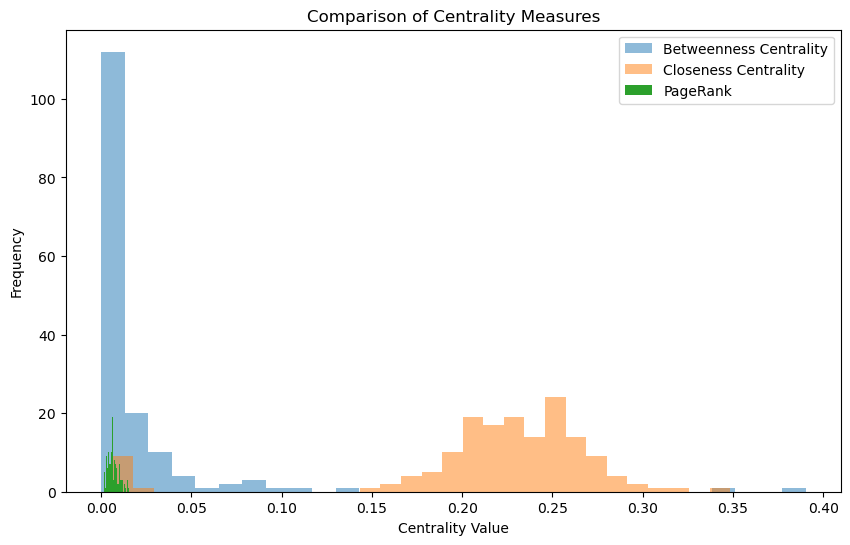

In [25]:
# Facebook Graph

# Calculate centrality metrics
betweenness = nx.betweenness_centrality(facebook_graph)
closeness = nx.closeness_centrality(facebook_graph)
pagerank = nx.pagerank(facebook_graph)

# Convert to sorted lists for comparison
betweenness_sorted = sorted(betweenness.items(), key=lambda item: item[1], reverse=True)
closeness_sorted = sorted(closeness.items(), key=lambda item: item[1], reverse=True)
pagerank_sorted = sorted(pagerank.items(), key=lambda item: item[1], reverse=True)

# Display how many node have a specific centrality metric
print(f'number of notes with betweeness metric: {len(betweenness_sorted)}')
print(f'number of notes with closness metric: {len(closeness_sorted)}')
print(f'number of notes with pagerank metric: {len(betweenness_sorted)}')

# Display the top 10 nodes by each metric
print("Top 10 nodes by Betweenness Centrality:", betweenness_sorted[:10])
print("Top 10 nodes by Closeness Centrality:", closeness_sorted[:10])
print("Top 10 nodes by PageRank:", pagerank_sorted[:10])

# Visualization (optional)
plt.figure(figsize=(10, 6))
plt.hist([v for k, v in betweenness_sorted], bins=30, alpha=0.5, label="Betweenness Centrality")
plt.hist([v for k, v in closeness_sorted], bins=30, alpha=0.5, label="Closeness Centrality")
plt.hist([v for k, v in pagerank_sorted], bins=30, alpha=1, label="PageRank")
plt.legend()
plt.title("Comparison of Centrality Measures")
plt.xlabel("Centrality Value")
plt.ylabel("Frequency")
plt.show()


Key Take Aways:

* Betweenness Centrality can provide infromation about critical nodes in terms of network flow and communication. So how important and  critical these nodes are for communication between different parts of the network. They don't have to be connected directly to a lot of nodes, they can serve as a bridge for nodes that are far apart.
 
* Closeness Centrality will rank nodes that are well-placed within a cluster or in a central position of the network. Such nodes are well connected either directly or trough short paths.

* PageRank identifies nodes that are important due to their connections to other influential nodes, which might not align with betweenness or closeness rankings.

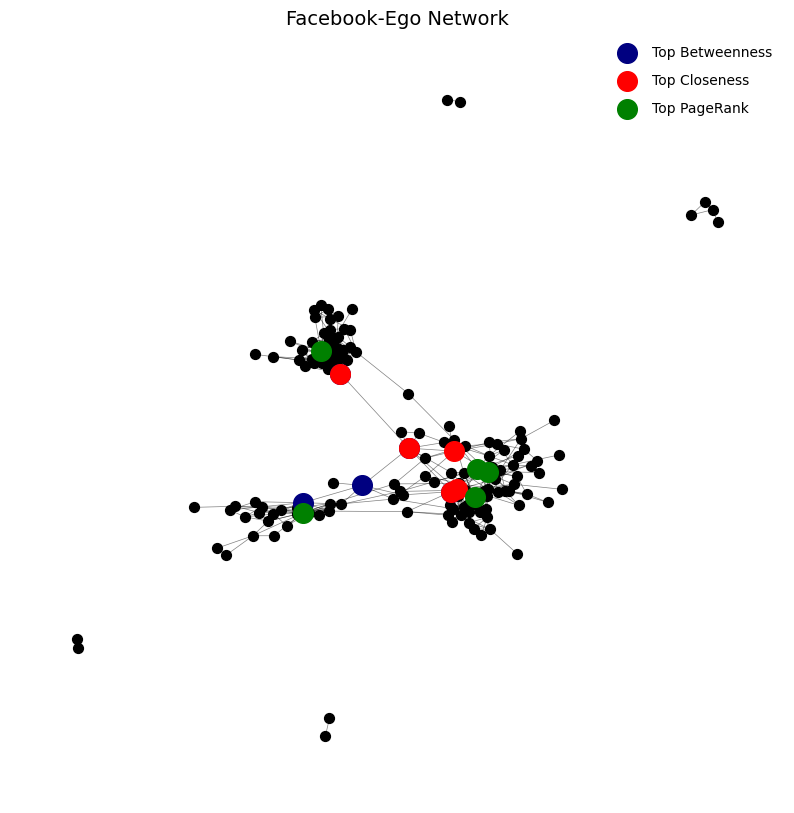

In [26]:
# Plot the Facebook-Ego network
plt.figure(figsize=(10, 10))  
# Use a layout for the network graph visualization
pos = nx.spring_layout(facebook_graph) 
nx.draw_networkx_nodes(facebook_graph, pos, node_size=50, node_color='black', alpha=1)
nx.draw_networkx_edges(facebook_graph, pos, width=0.5, alpha=0.5)

top_betweenness = sorted(betweenness, key=betweenness.get, reverse=True)[:5]
top_closeness = sorted(closeness, key=closeness.get, reverse=True)[:5]
top_pagerank = sorted(pagerank, key=pagerank.get, reverse=True)[:5]


# Highlight top nodes by centrality measures with different colors
nx.draw_networkx_nodes(facebook_graph, pos, nodelist=top_betweenness, node_color='navy', node_size=200, label="Top Betweenness")
nx.draw_networkx_nodes(facebook_graph, pos, nodelist=top_closeness, node_color='red', node_size=200, label="Top Closeness")
nx.draw_networkx_nodes(facebook_graph, pos, nodelist=top_pagerank, node_color='green', node_size=200, label="Top PageRank")

# Add a legend to the plot
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='best')

plt.title("Facebook-Ego Network", fontsize=14)
plt.axis('off')

# Show the plot
plt.show()

### (b) Please compare the results in (a). What cause the difference between the results?

 So I would say as you can see on the graph there are a very few important nodes in terms of **betweeness centrality (the blue nodes)**, which means nodes actually serving a bridge or connection to nodes that are far away, in this example the two blue node connecting the big cluster and the mini cluster, so most of the nodes in the clsuter have a lower score.
In terms of **closeness centrality (red nodes)** most of the nodes with higher values are positioned in the big cluster which makes sense, so no skewed distribution here. The same goes foer the **PageRank (green nodes)** the acutal values are in range of 0 and 0.01 so a very low total value but a tight range in terms of the distribution of the values.   

### (c) Please plot the largest strong connected component in the Twitter-Ego dataset

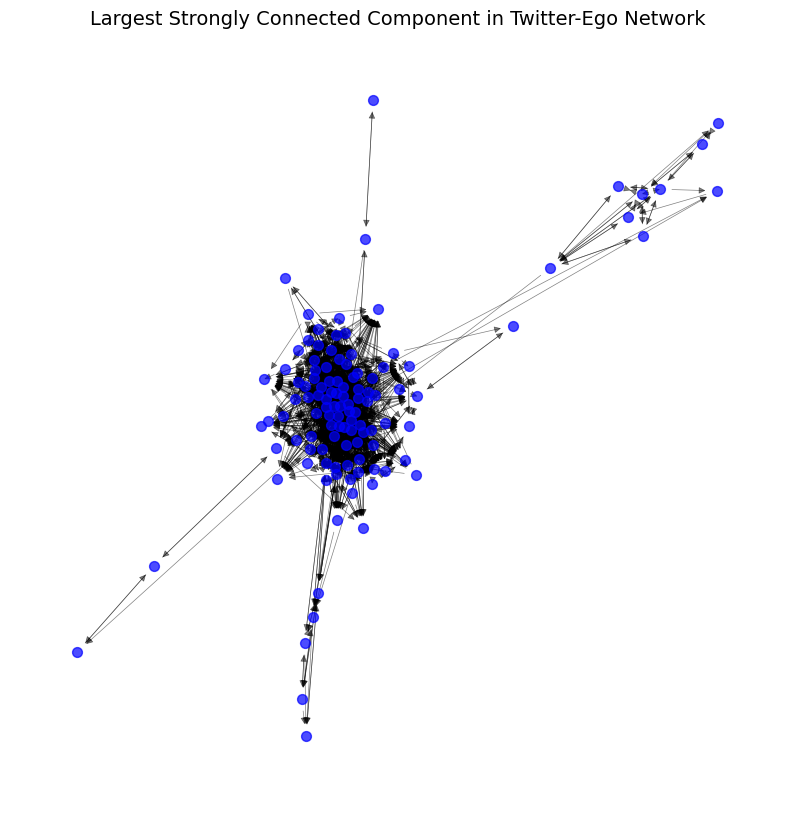

In [27]:
# Find all strongly connected components
sccs = list(nx.strongly_connected_components(twitter_graph))

# Find the largest strongly connected component
largest_scc = max(sccs, key=len)

# Create a subgraph of the largest SCC
largest_scc_subgraph = twitter_graph.subgraph(largest_scc)

# Plot the largest SCC
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(largest_scc_subgraph)
nx.draw_networkx_nodes(largest_scc_subgraph, pos, node_size=50, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(largest_scc_subgraph, pos, width=0.5, alpha=0.5)
plt.title("Largest Strongly Connected Component in Twitter-Ego Network", fontsize=14)
plt.axis('off')
plt.show()


### (d) Choose the results of one of the two algorithms mentioned in question (a), and choose the node with the highest value and the node with lowest value. Please plot the distributions of Jaccardsimilarity, cosine similarity and normalized Euclidean distance between either of the two nodes and the rest of the nodes in the graph.

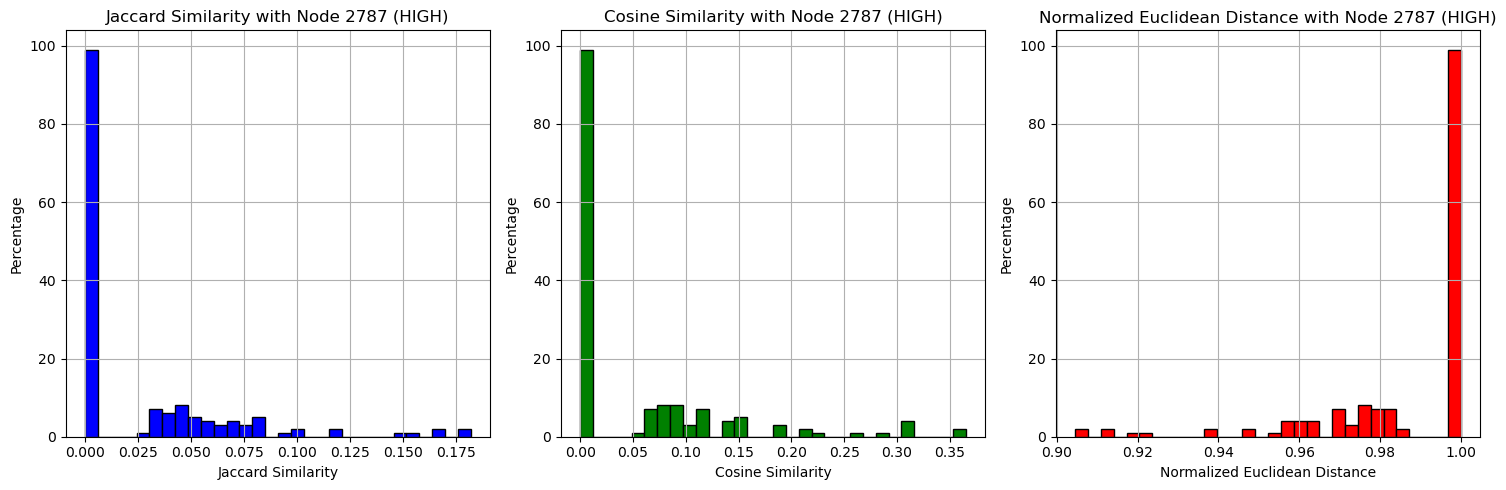

In [30]:
betweenness = nx.betweenness_centrality(facebook_graph)

highest_betweenness_node = max(betweenness, key=betweenness.get)
lowest_betweenness_node = min(betweenness, key=betweenness.get)


def jaccard_similarity(graph, node1, node2):
    """Calculate Jaccard similarity between two nodes."""
    neighbors1 = set(graph.neighbors(node1))
    neighbors2 = set(graph.neighbors(node2))
    intersection = len(neighbors1 & neighbors2)
    union = len(neighbors1 | neighbors2)
    return intersection / union if union != 0 else 0

def cosine_similarity_nodes(graph, node1, node2):
    """Calculate cosine similarity between two nodes based on neighbors."""
    neighbors1 = set(graph.neighbors(node1))
    neighbors2 = set(graph.neighbors(node2))
    
    # Create binary vectors
    all_neighbors = list(set(neighbors1) | set(neighbors2))
    vec1 = [1 if n in neighbors1 else 0 for n in all_neighbors]
    vec2 = [1 if n in neighbors2 else 0 for n in all_neighbors]
    
    return cosine_similarity([vec1], [vec2])[0][0]

def normalized_euclidean_distance(graph, node1, node2):
    """Calculate normalized Euclidean distance between two nodes based on neighbors."""
    neighbors1 = set(graph.neighbors(node1))
    neighbors2 = set(graph.neighbors(node2))
    
    # Create binary vectors
    all_neighbors = list(set(neighbors1) | set(neighbors2))
    vec1 = np.array([1 if n in neighbors1 else 0 for n in all_neighbors])
    vec2 = np.array([1 if n in neighbors2 else 0 for n in all_neighbors])
    
   
    euclidean_dist = np.linalg.norm(vec1 - vec2)
    
    # Normalize by dividing by the number of neighbors
    return euclidean_dist / np.linalg.norm(np.ones(len(all_neighbors)))


nodes = list(facebook_graph.nodes())

# Highest Node 
jaccard_high = [jaccard_similarity(facebook_graph, highest_betweenness_node, node) for node in nodes if node != highest_betweenness_node]
cosine_high = [cosine_similarity_nodes(facebook_graph, highest_betweenness_node, node) for node in nodes if node != highest_betweenness_node]
euclidean_high = [normalized_euclidean_distance(facebook_graph, highest_betweenness_node, node) for node in nodes if node != highest_betweenness_node]


plt.figure(figsize=(15, 5))

# Jaccard Similarity
plt.subplot(1, 3, 1)
plt.hist(jaccard_high, bins=30, color='blue', edgecolor='black')
plt.title(f'Jaccard Similarity with Node {highest_betweenness_node} (HIGH)')
plt.xlabel('Jaccard Similarity')
plt.ylabel('Percentage')
plt.grid(True)

# Cosine Similarity
plt.subplot(1, 3, 2)
plt.hist(cosine_high, bins=30, color='green', edgecolor='black')
plt.title(f'Cosine Similarity with Node {highest_betweenness_node} (HIGH)')
plt.xlabel('Cosine Similarity')
plt.ylabel('Percentage')
plt.grid(True)

# Normalized Euclidean Distance
plt.subplot(1, 3, 3)
plt.hist(euclidean_high, bins=30, color='red', edgecolor='black')
plt.title(f'Normalized Euclidean Distance with Node {highest_betweenness_node} (HIGH)')
plt.xlabel('Normalized Euclidean Distance')
plt.ylabel('Percentage')
plt.grid(True)


plt.tight_layout()
plt.show()


